In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pyarrow.parquet as pq
import pyarrow as pa
import os

np.random.seed(42)

In [2]:
# Loading new query dataset:

queries_amazon_review_sample_good = pd.read_json('../other_datasets/queries_amazon_review_sample_good.json', lines=True)
print('Number of items in queries_amazon_review_sample_good', queries_amazon_review_sample_good['item_id'].nunique())
queries_amazon_review_sample_good.head()

Number of items in queries_amazon_review_sample_good 256658


,query,item_id,proba,entropy,predicted_label
0,party to go mobile in store,B003ZRA3EI,"[0.04296875, 0.0252685546875, 0.93359375]",0.292969,2
1,double mijwiz in store,B00CB5BMHW,"[0.0108642578125, 0.0189208984375, 0.968750000...",0.155273,2
2,restaurant gift card,B00PG23W84,"[0.001014709472656, 0.00457763671875, 0.99609375]",0.034912,2
3,free calling,B00JFOFJSK,"[0.0103759765625, 0.051025390625, 0.9375]",0.259766,2
4,gift cards to purchase,B01GKWEY9O,"[0.0018615722656250002, 0.004608154296875, 0.9...",0.039062,2


In [3]:
# Loading ESCI dataset:

df_examples = pd.read_parquet('../other_datasets/shopping_queries_dataset_examples.parquet')
esci_dataset_all_product_ids = set(df_examples['product_id'])
print(len(esci_dataset_all_product_ids))
df_examples.head()

1802772


,example_id,query,query_id,product_id,product_locale,esci_label,small_version,large_version,split
0,0,revent 80 cfm,0,B000MOO21W,us,I,0,1,train
1,1,revent 80 cfm,0,B07X3Y6B1V,us,E,0,1,train
2,2,revent 80 cfm,0,B07WDM7MQQ,us,E,0,1,train
3,3,revent 80 cfm,0,B07RH6Z8KW,us,E,0,1,train
4,4,revent 80 cfm,0,B07QJ7WYFQ,us,E,0,1,train


In [4]:
# Removing items from new query dataset which occur in ESCI: 

query_asins = set(queries_amazon_review_sample_good['item_id'].unique())
print('Number of items in queries_amazon_review_sample_good', len(query_asins))

query_asins_minus_esci_dataset = query_asins.difference(esci_dataset_all_product_ids)

print("Number of items in query_asins_minus_esci_dataset:",  len(query_asins_minus_esci_dataset))

Number of items in queries_amazon_review_sample_good 256658
Number of items in query_asins_minus_esci_dataset: 251998


In [5]:
# combining all category parquet files into one: (uncomment the following lines)

csv_files = [file for file in os.listdir('../downloaded_amazon_meta_datasets_csv') if file.endswith('.csv')]
print(len(csv_files))

parquet_writer = None

for csv_file in tqdm(csv_files):
    print(csv_file)
    for chunk in pd.read_csv('../downloaded_amazon_meta_datasets_csv/'+csv_file, chunksize=10000):
        chunk = chunk.astype(str)
        table = pa.Table.from_pandas(chunk)
        if parquet_writer is None:
            print('table schema', table.schema)
            parquet_writer = pq.ParquetWriter('../downloaded_amazon_meta_datasets_csv/amazon_reviews_23_all_metadata_appended.parquet', table.schema)
        parquet_writer.write_table(table)
        del table
        del chunk

if parquet_writer is not None:
    parquet_writer.close()

31


  0%|          | 0/31 [00:00<?, ?it/s]

raw_meta_Kindle_Store.csv
table schema main_category: string
title: string
average_rating: string
rating_number: string
features: string
description: string
images: string
videos: string
details: string
parent_asin: string
-- schema metadata --
pandas: '{"index_columns": [{"kind": "range", "name": null, "start": 0, "' + 1451


  3%|▎         | 1/31 [01:55<57:55, 115.85s/it]

raw_meta_Health_and_Personal_Care.csv


  6%|▋         | 2/31 [01:57<23:25, 48.48s/it] 

raw_meta_Clothing_Shoes_and_Jewelry.csv


 10%|▉         | 3/31 [06:04<1:05:00, 139.30s/it]

raw_meta_Health_and_Household.csv


 13%|█▎        | 4/31 [06:45<45:08, 100.30s/it]  

raw_meta_Tools_and_Home_Improvement.csv


 16%|█▌        | 5/31 [08:04<40:13, 92.83s/it] 

raw_meta_Office_Products.csv


 19%|█▉        | 6/31 [08:40<30:35, 73.43s/it]

raw_meta_Amazon_Fashion.csv


 23%|██▎       | 7/31 [08:44<20:21, 50.91s/it]

raw_meta_Pet_Supplies.csv


 26%|██▌       | 8/31 [09:09<16:19, 42.59s/it]

raw_meta_Industrial_and_Scientific.csv


 29%|██▉       | 9/31 [09:28<12:53, 35.15s/it]

raw_meta_Cell_Phones_and_Accessories.csv


 32%|███▏      | 10/31 [10:21<14:15, 40.73s/it]

raw_meta_Baby_Products.csv


 35%|███▌      | 11/31 [10:33<10:34, 31.72s/it]

raw_meta_Handmade_Products.csv


 39%|███▊      | 12/31 [10:38<07:30, 23.69s/it]

raw_meta_Musical_Instruments.csv


 42%|████▏     | 13/31 [10:53<06:18, 21.05s/it]

raw_meta_Appliances.csv


 45%|████▌     | 14/31 [10:58<04:36, 16.26s/it]

raw_meta_Patio_Lawn_and_Garden.csv


 48%|████▊     | 15/31 [11:41<06:28, 24.29s/it]

raw_meta_Books.csv


 52%|█████▏    | 16/31 [16:44<27:03, 108.25s/it]

raw_meta_Digital_Music.csv


 55%|█████▍    | 17/31 [16:44<17:41, 75.79s/it] 

raw_meta_Electronics.csv


 58%|█████▊    | 18/31 [18:13<17:13, 79.51s/it]

raw_meta_Arts_Crafts_and_Sewing.csv


 61%|██████▏   | 19/31 [18:51<13:25, 67.15s/it]

raw_meta_Video_Games.csv


 65%|██████▍   | 20/31 [18:59<09:02, 49.33s/it]

raw_meta_Home_and_Kitchen.csv


 68%|██████▊   | 21/31 [23:14<18:32, 111.27s/it]

raw_meta_Grocery_and_Gourmet_Food.csv


 71%|███████   | 22/31 [23:58<13:38, 91.00s/it] 

raw_meta_Movies_and_TV.csv


 74%|███████▍  | 23/31 [24:01<08:35, 64.42s/it]

raw_meta_Automotive.csv


 77%|███████▋  | 24/31 [25:47<08:59, 77.06s/it]

raw_meta_CDs_and_Vinyl.csv


 81%|████████  | 25/31 [25:48<05:24, 54.08s/it]

raw_meta_Beauty_and_Personal_Care.csv


 84%|████████▍ | 26/31 [26:30<04:12, 50.57s/it]

raw_meta_Sports_and_Outdoors.csv


 87%|████████▋ | 27/31 [27:40<03:45, 56.33s/it]

raw_meta_Gift_Cards.csv
raw_meta_Software.csv


 94%|█████████▎| 29/31 [27:47<01:04, 32.01s/it]

raw_meta_All_Beauty.csv


 97%|█████████▋| 30/31 [27:49<00:24, 24.51s/it]

raw_meta_Toys_and_Games.csv


100%|██████████| 31/31 [28:40<00:00, 55.51s/it]


In [6]:
# Loading all_meta dataset:

all_metadata = pd.read_parquet('../downloaded_amazon_meta_datasets_csv/amazon_reviews_23_all_metadata_appended.parquet')

print(len(all_metadata))
all_metadata.head()

15772737


,main_category,title,average_rating,rating_number,features,description,images,videos,details,parent_asin
0,Buy a Kindle,Microsoft PowerPoint 2016 2013 2010 2007 Tips ...,4.3,35,"['Paperback versions are also available, inclu...",['From the Author'\n 'Amelia Griggs is an Inst...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publication date"": ""June 2, 2018"", ""Language...",B07DH1LF1K
1,Buy a Kindle,Ill Wind (Anna Pigeon Mysteries Book 3),4.4,1628,"[""Lately, visitors to Mesa Verde have been bri...",['From Publishers Weekly'\n 'Barr lands anothe...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publisher"": ""Berkley; Reissue edition (March...",B0022Q8CTQ
2,Buy a Kindle,The Road Home,4.5,475,"['In one of Jim Harrison’s greatest works, fiv...","['Review'\n '""A graceful novel...To read this ...","{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publisher"": ""Atlantic Monthly Press (Decembe...",B00155EZRS
3,Buy a Kindle,Vampires Rule (Rule Series Book 1),4.3,1182,['A simple boy-meets-girl story.Only the boy i...,['Review'\n 'What do readers on Goodreads have...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publication date"": ""May 2, 2011"", ""Language""...",B004YZB8XU
4,Buy a Kindle,Missy Goes to Annapolis (Missy the Werecat Boo...,4.6,724,['Missy Goes to Annapolis: Book IX'\n 'After h...,['From the Author' '*** New Adult book best su...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publication date"": ""June 22, 2021"", ""Languag...",B091N666DM


In [7]:
# checking number of products per category:
print(all_metadata.groupby('main_category').size())

main_category
AMAZON FASHION                  3443475
All Beauty                       460083
All Electronics                  270889
Amazon Devices                     3106
Amazon Elements                       3
Amazon Fire TV                       81
Amazon Home                     2333035
Apple Products                       56
Appliances                        26957
Appstore for Android              65409
Arts, Crafts & Sewing            281059
Audible Audiobooks                  201
Automotive                      1191490
Baby                              96812
Books                           1713532
Buy a Kindle                     759219
Camera & Photo                   129566
Car Electronics                   25348
Cell Phones & Accessories        524972
Collectible Coins                 10337
Collectibles & Fine Art            9660
Computers                        251018
Digital Music                     15547
Entertainment                      6097
Fine Art                  

In [8]:
all_metadata['main_category'] = all_metadata['main_category'].replace('nan', np.nan)
all_metadata.dropna(subset=['main_category'], inplace=True)
print(all_metadata.groupby('main_category').size())

main_category
AMAZON FASHION                  3443475
All Beauty                       460083
All Electronics                  270889
Amazon Devices                     3106
Amazon Elements                       3
Amazon Fire TV                       81
Amazon Home                     2333035
Apple Products                       56
Appliances                        26957
Appstore for Android              65409
Arts, Crafts & Sewing            281059
Audible Audiobooks                  201
Automotive                      1191490
Baby                              96812
Books                           1713532
Buy a Kindle                     759219
Camera & Photo                   129566
Car Electronics                   25348
Cell Phones & Accessories        524972
Collectible Coins                 10337
Collectibles & Fine Art            9660
Computers                        251018
Digital Music                     15547
Entertainment                      6097
Fine Art                  

In [9]:
# Removing esci sins from meta_datset

print(len(set(esci_dataset_all_product_ids)))

print(len(all_metadata), len(set(all_metadata['parent_asin'])))

all_meta_minus_esci = all_metadata[~all_metadata['parent_asin'].isin(esci_dataset_all_product_ids)]

print(len(all_meta_minus_esci), len(set(all_meta_minus_esci['parent_asin'])))

1802772
15772728 15772728
15538295 15538295


In [10]:
# Refining meta_dataset

print('original', len(all_meta_minus_esci))

all_meta_minus_esci = all_meta_minus_esci[all_meta_minus_esci['title'].str.len() >= 5]
print('removing title < 5', len(all_meta_minus_esci))

all_meta_minus_esci = all_meta_minus_esci[all_meta_minus_esci['features'] != '[]']
print('removing empty features', len(all_meta_minus_esci))

all_meta_minus_esci = all_meta_minus_esci[all_meta_minus_esci['description'] != '[]']
print('removing empty description', len(all_meta_minus_esci))

all_meta_minus_esci = all_meta_minus_esci[all_meta_minus_esci['details'] != '{}']
print('removing empty details', len(all_meta_minus_esci))

all_meta_minus_esci = all_meta_minus_esci.dropna()
print('removing rows with nan', len(all_meta_minus_esci))



original 15538295
removing title < 5 15538078
removing empty features 15453266
removing empty description 15403671
removing empty details 15403479
removing rows with nan 15403479


In [11]:
# randomly sampling 130,000 products from each category

sampled_meta_dataset = all_meta_minus_esci.groupby('main_category').apply(lambda x: x.sample(min(130000, len(x)))).reset_index(drop=True)
print(len(sampled_meta_dataset))
sampled_meta_dataset.head()

3086772


,main_category,title,average_rating,rating_number,features,description,images,videos,details,parent_asin
0,AMAZON FASHION,"Casio Men's Classic Round Analog Watch, 3-Hand...",3.8,5,"[""Men's Dressy Classic 3-Hand Analog Round Wat...","['Casio Mens Classic Round Analog Watch, With ...",{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Is Discontinued By Manufacturer"": ""No"", ""Pac...",B00G8JHOKQ
1,AMAZON FASHION,"WKDYBD Men Elastic Belt,Nylon Canvas Breathabl...",4.3,2,"['Canvas,Elastic,Nylon' 'Ratchet closure' 'Wet...",['Product information:'\n '100% brand new and ...,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Department"": ""mens"", ""Date First Available"":...",B07S65T7TJ
2,AMAZON FASHION,SMajong Mules for Women Slip On Flat Loafers L...,4.0,181,['Rubber sole' 'Heel measures approximately 1....,"['==Item Type: Peas Boat Shoes,Slipper.'\n '==...",{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Department"": ""Womens"", ""Date First Available...",B0BM94TG5V
3,AMAZON FASHION,Alegria Womens Colette,4.5,395,['100% Leather' 'Made in USA or Imported' 'man...,"[""Alegria Footwear Size Guide The lovely Alegr...",{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Package Dimensions"": ""11.9 x 7.9 x 4.6 inche...",B075JNKJJW
4,AMAZON FASHION,IOEGW Women's Thighs Like What What T Shirt Su...,3.0,7,['100% Cotton' 'Pull On closure' 'Machine Wash...,['Women Thighs Like What What T-Shirt Funny Le...,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Department"": ""Womens"", ""Date First Available...",B08Y8H7XQP


In [12]:
# removing rows with query asins

print(len(query_asins_minus_esci_dataset))
print(sampled_meta_dataset['parent_asin'].nunique())

sampled_meta_dataset_minus_query_asins = sampled_meta_dataset[~sampled_meta_dataset['parent_asin'].isin(query_asins_minus_esci_dataset)]

print(len(sampled_meta_dataset_minus_query_asins))
print(sampled_meta_dataset_minus_query_asins['parent_asin'].nunique())

251998
3086772
3037169
3037169


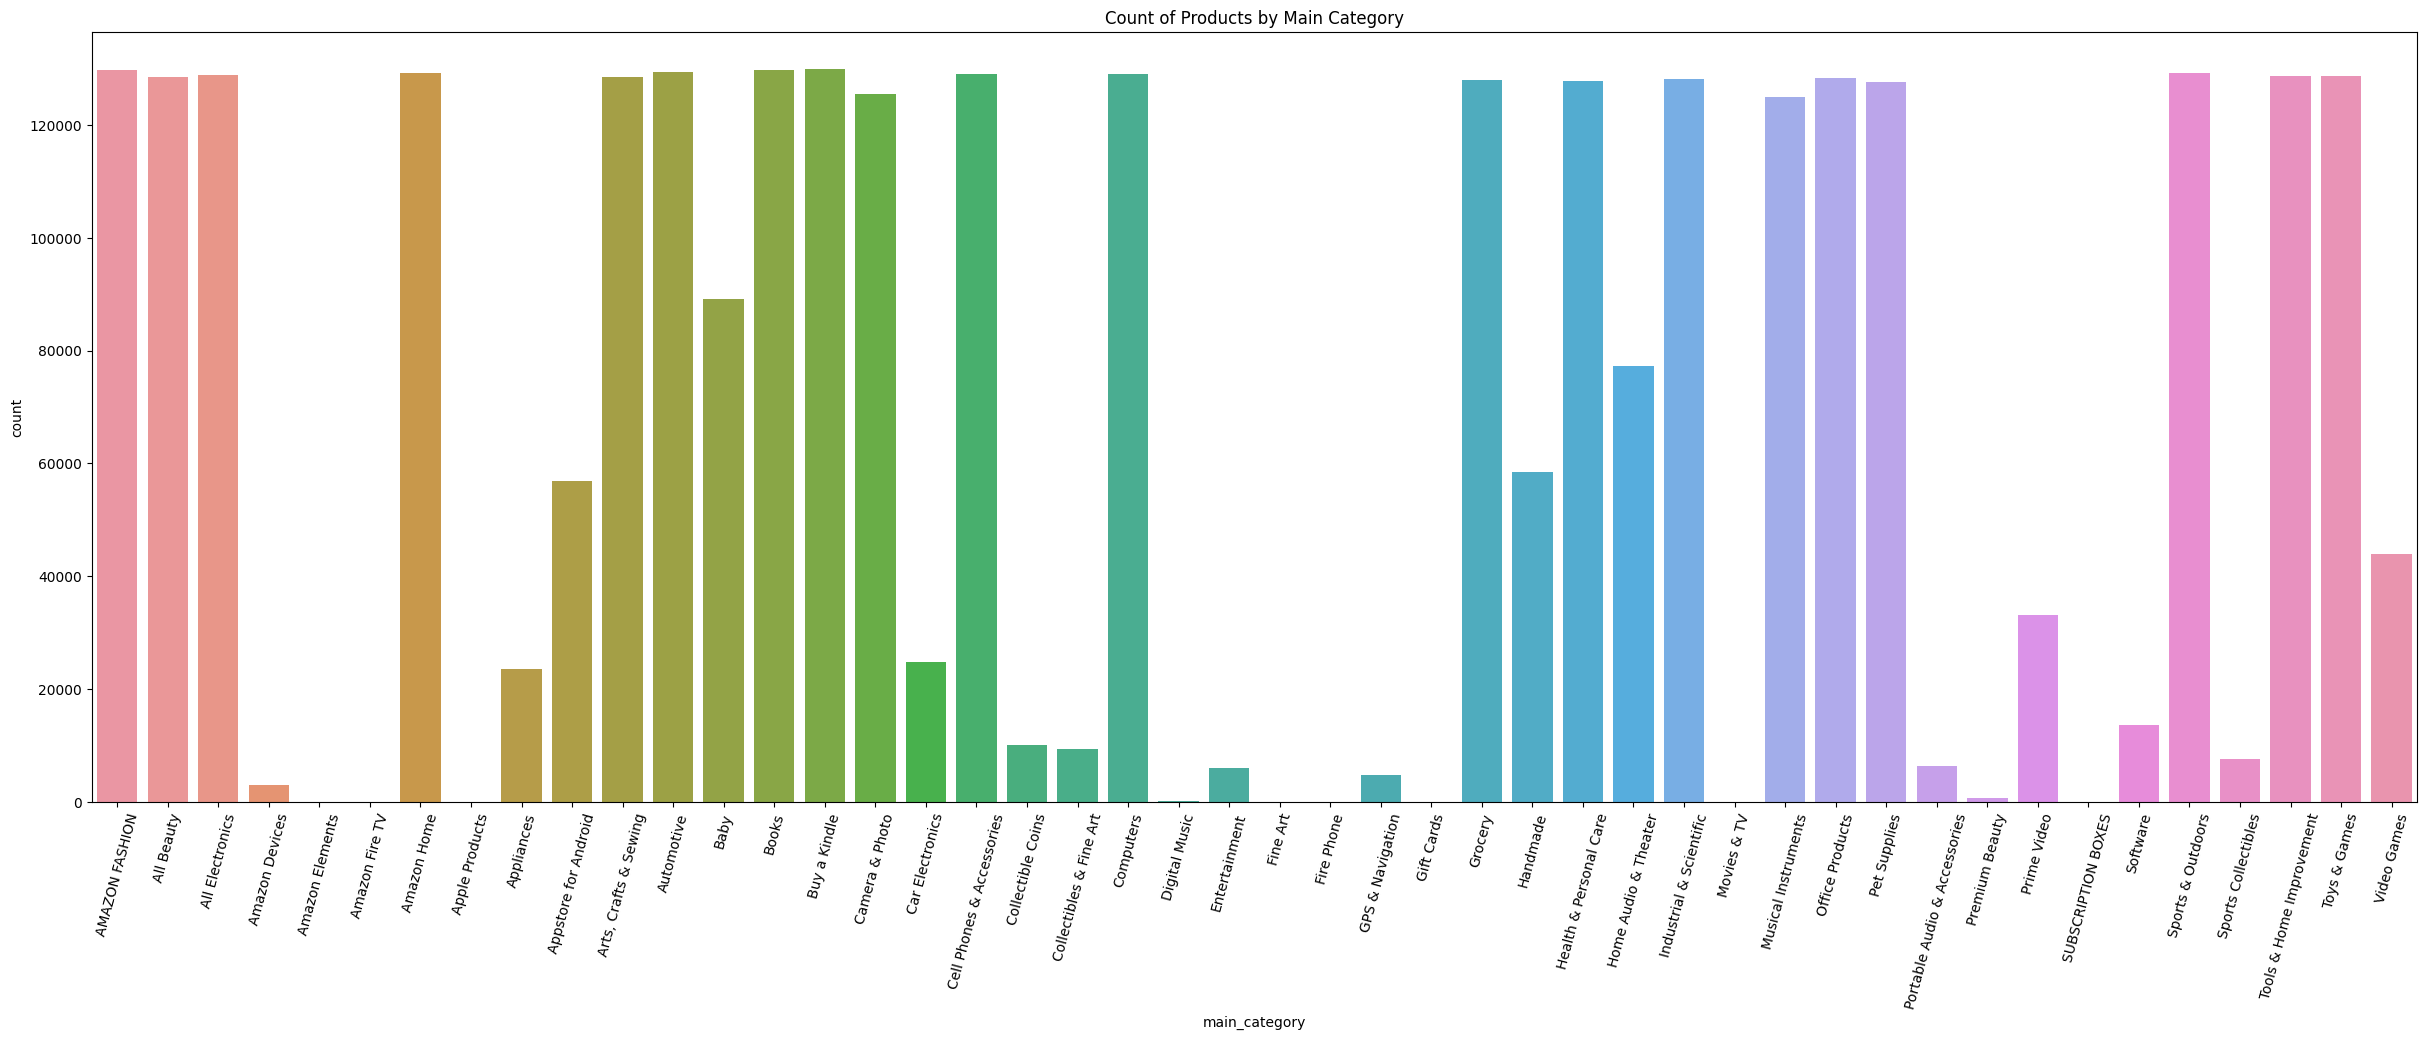

In [13]:
plt.figure(figsize=(30, 10))
sns.countplot(x='main_category', data=sampled_meta_dataset_minus_query_asins)
plt.title('Count of Products by Main Category')
plt.xticks(rotation=75)
plt.show()

In [14]:
# create sub_meta_dataset for query asins

print(len(query_asins_minus_esci_dataset))
print(all_metadata['parent_asin'].nunique())

query_asin_metadata = all_metadata[all_metadata['parent_asin'].isin(query_asins_minus_esci_dataset)]

print(len(query_asin_metadata), query_asin_metadata['parent_asin'].nunique())

251998
15772728
251989 251989


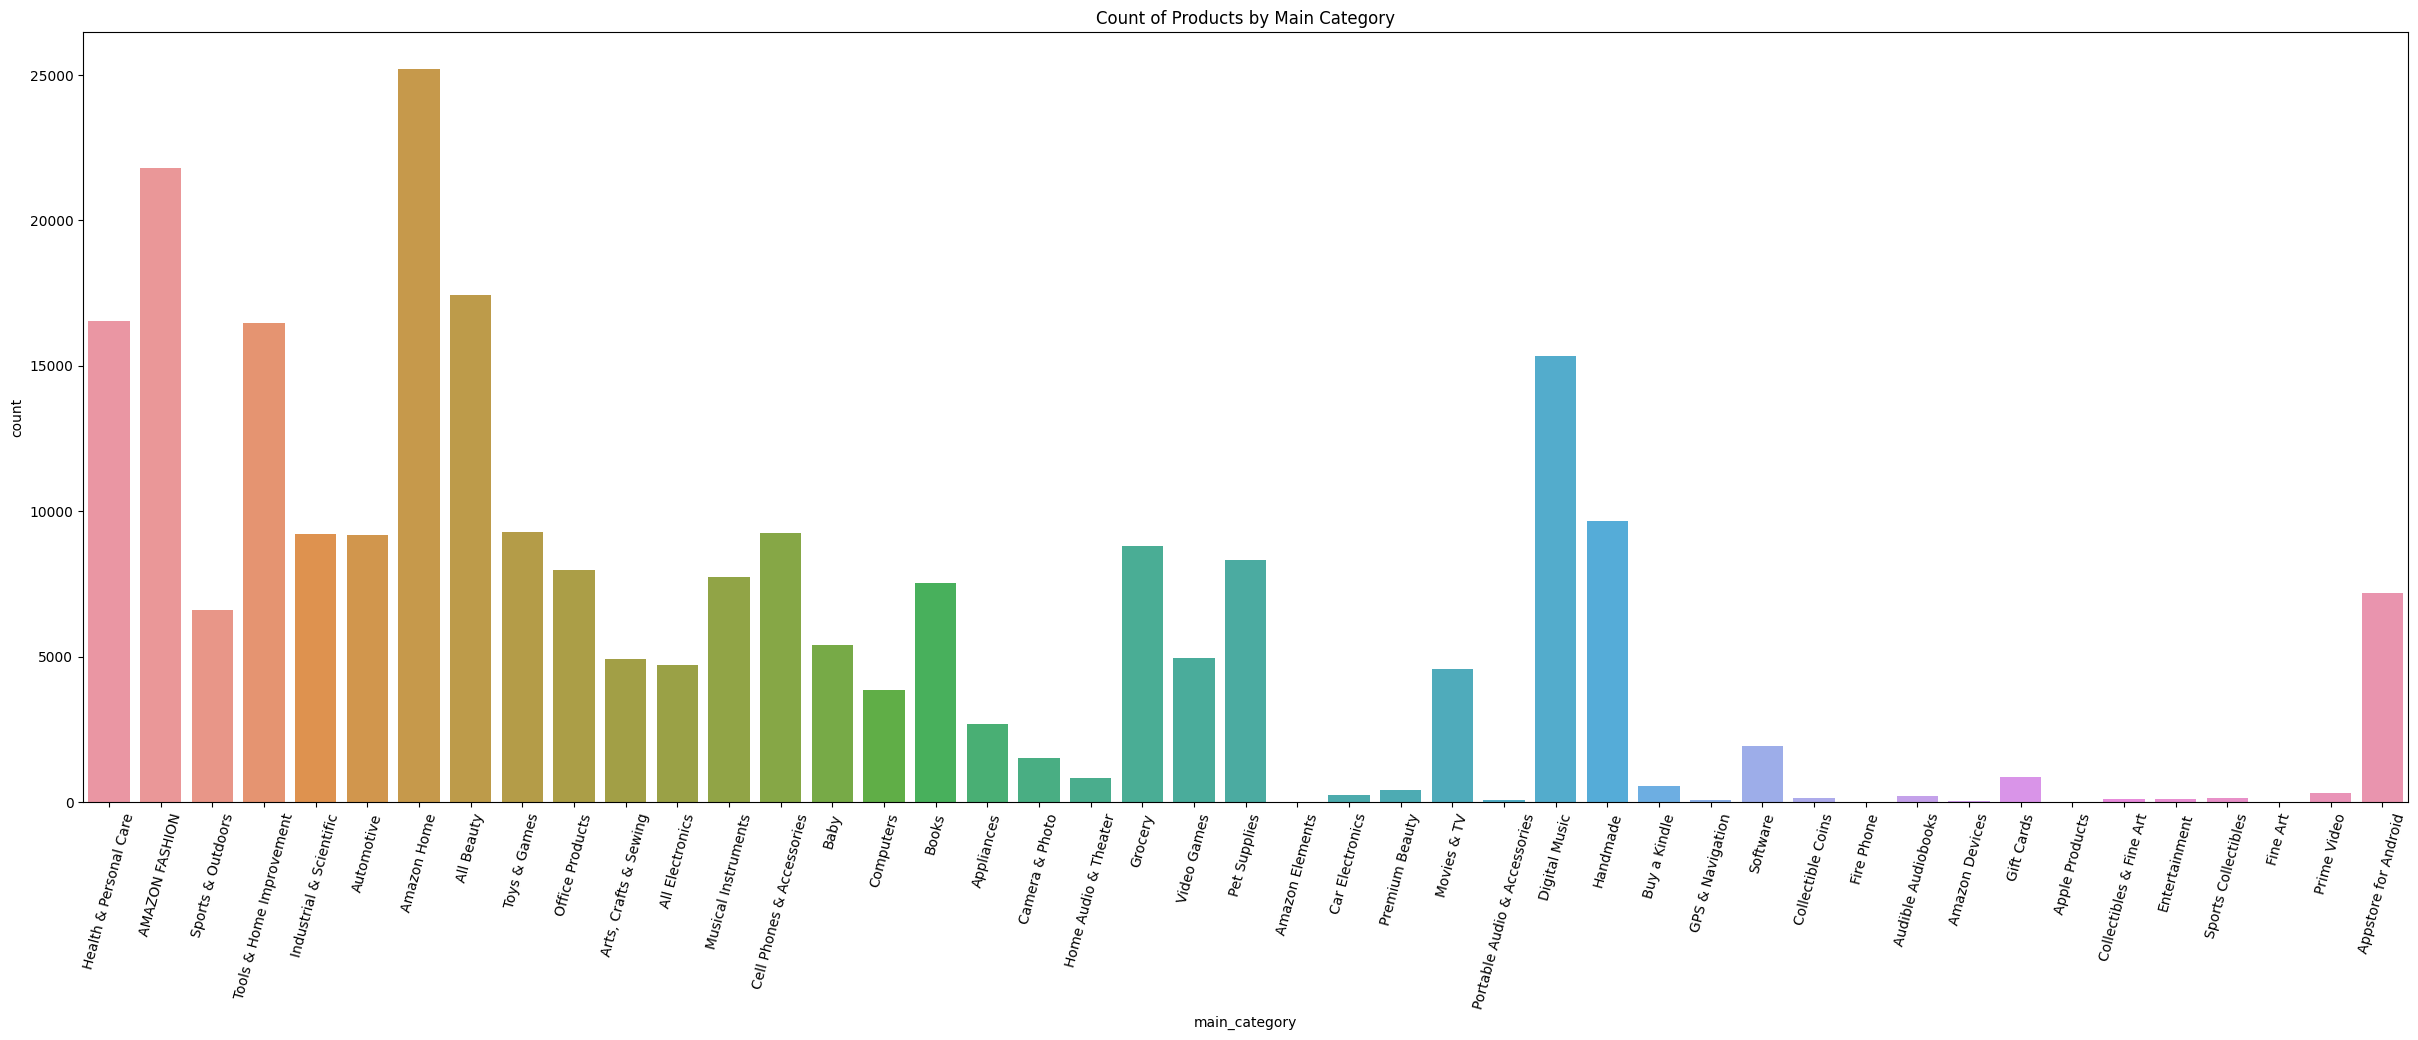

In [15]:
plt.figure(figsize=(30, 10))
sns.countplot(x='main_category', data=query_asin_metadata)
plt.title('Count of Products by Main Category')
plt.xticks(rotation=75)
plt.show()

In [16]:
# query_asin_metadata['from_query_dataset'] = 1
# sampled_meta_dataset_minus_query_asins['from_query_dataset'] = 0

print('length of query_asin_metadata', len(query_asin_metadata))
print('length of sampled_meta_dataset_minus_query_asins', len(sampled_meta_dataset_minus_query_asins))

combined_df = pd.concat([query_asin_metadata, sampled_meta_dataset_minus_query_asins], ignore_index=True)
print('length of combined_df', len(combined_df))
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

combined_df.head()

length of query_asin_metadata 251989
length of sampled_meta_dataset_minus_query_asins 3037169
length of combined_df 3289158


,main_category,title,average_rating,rating_number,features,description,images,videos,details,parent_asin
0,Pet Supplies,Collapsible Dog Travel Bowl - Large,1.0,1,['Holds both food and water' 'Easy to clean an...,['Collapsible Dog Travel Large Bowl. This very...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Target Species"": ""Dog"", ""Special Feature"": ""...",B005FRLGF6
1,Buy a Kindle,ThoughtFull: Discovering Unique Gifts in Each ...,4.8,105,['This encouraging story shows how life change...,['About the Author' 'For more than twenty-two ...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publisher"": ""B&H Kids (August 15, 2018)"", ""P...",B07FYWV1HZ
2,Toys & Games,YU-GI-OH! - Brain Control (TLM-EN038) - The Lo...,4.7,4,['A single individual card from the Yu-Gi-Oh! ...,"[""Yu-Gi-Oh! is a strategic trading card game i...","{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Item Weight"": ""0.06 ounces"", ""Manufacturer r...",B0028WKKU8
3,Appstore for Android,Word Search Inspiration,4.3,218.0,['EASY TO PLAY - It starts easy but gets chall...,['Find inspiration and activate your brain wit...,"{'hi_res': array([None, None, None, None, None...","{'title': array([''], dtype=object), 'url': ar...","{""Release Date"": ""2020"", ""Date first listed on...",B088R6YNZX
4,Prime Video,Ancient Greek Civilization Lecture 3 of 10 The...,4.2,7.0,['1 h 19 min' '2010' 'NR'],['Lecture 3 of 10: The Trojan War. As the My...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Content advisory"": [""Nudity"", ""violence""], ""...",B0042QES9M


3289158


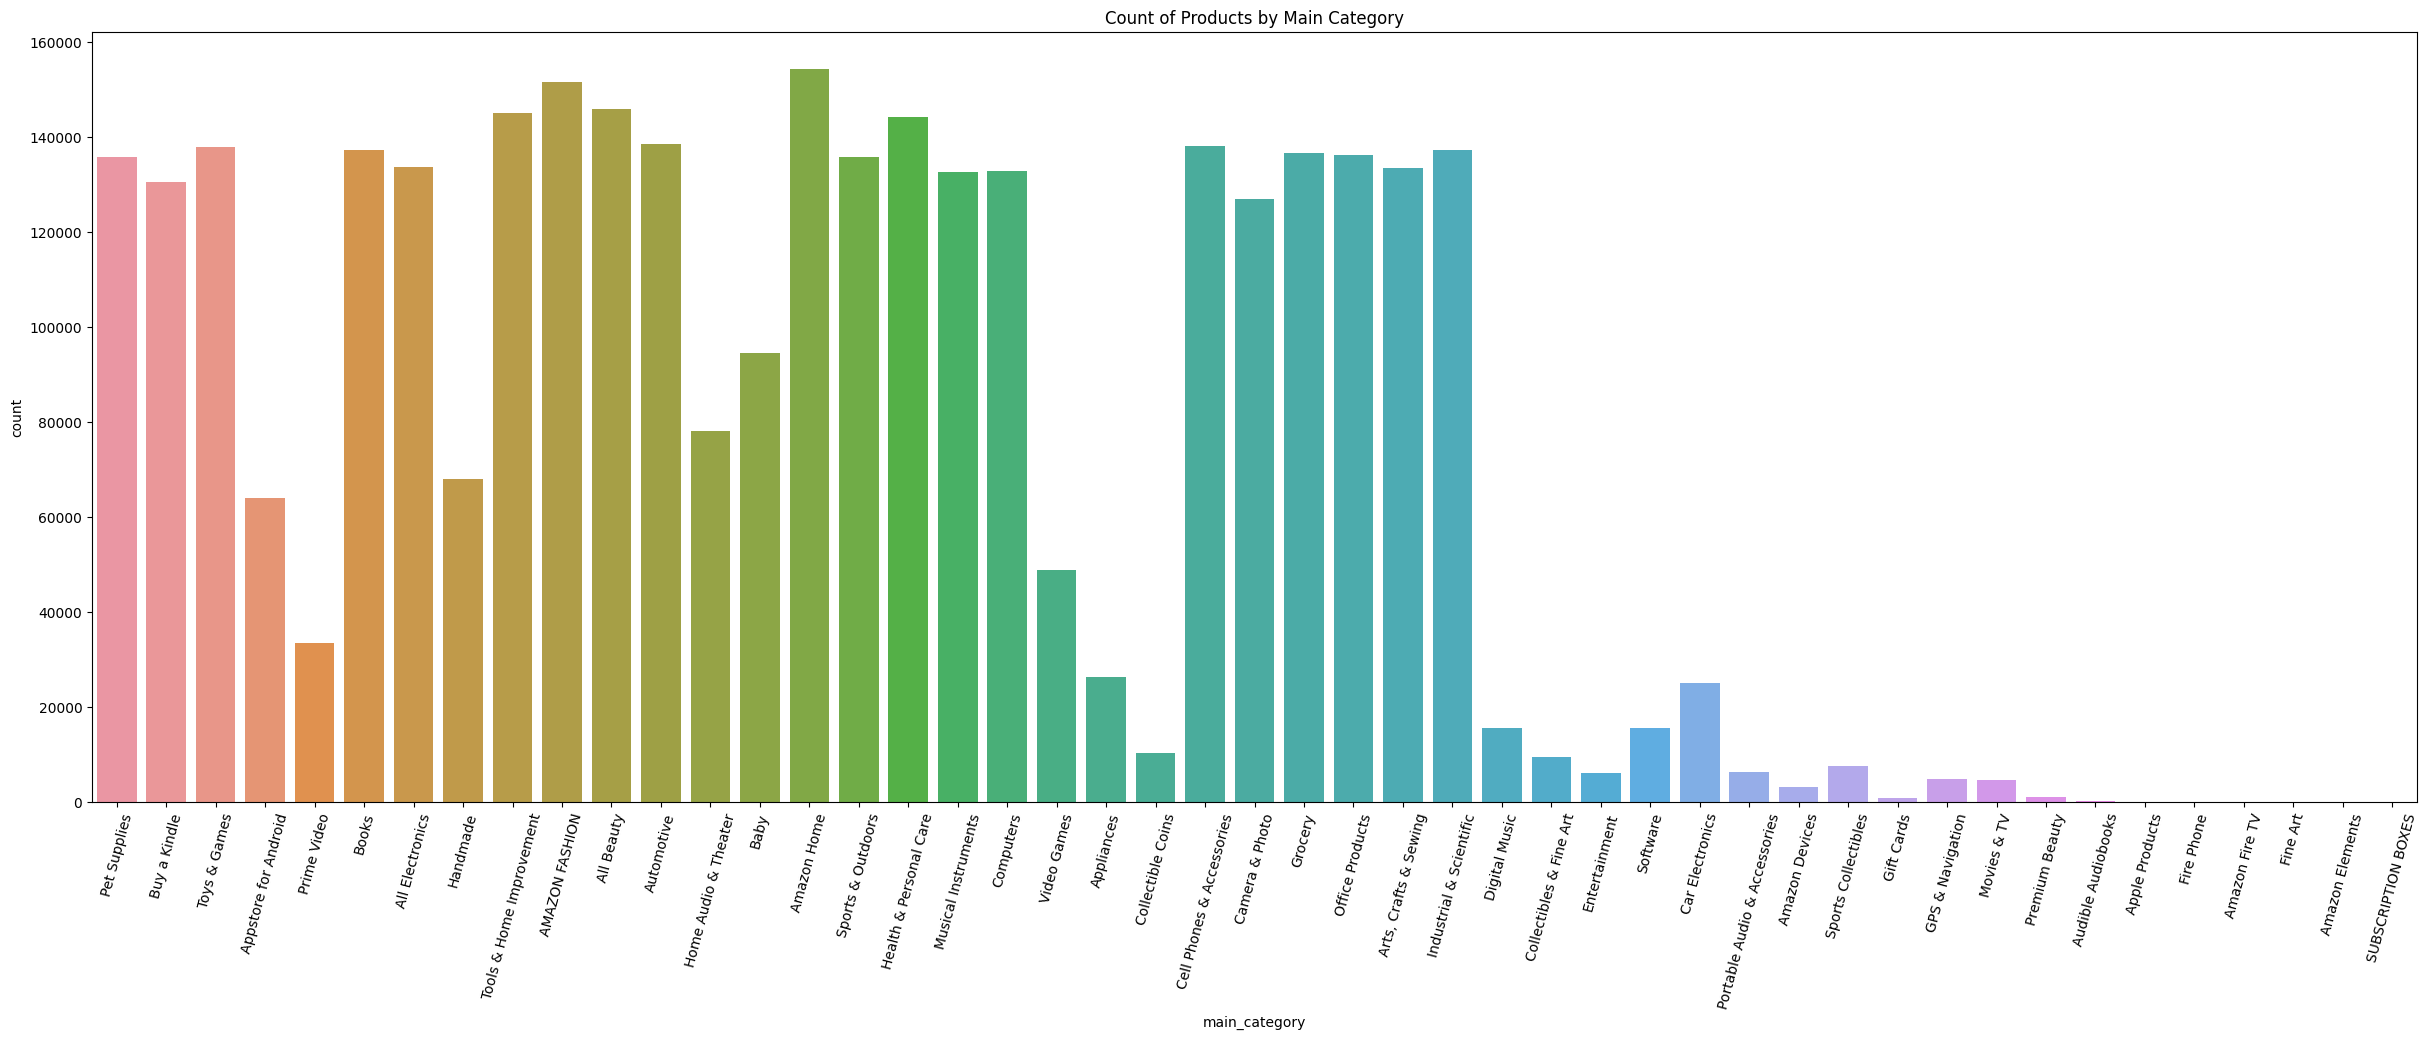

In [17]:
print(len(combined_df))
plt.figure(figsize=(30, 10))
sns.countplot(x='main_category', data=combined_df)
plt.title('Count of Products by Main Category')
plt.xticks(rotation=75)
plt.show()

In [18]:
combined_df.to_parquet('../zero_shot_retrieval_task_dataset.parquet', index=False)

# Reading the final dataset:

In [1]:
import pandas as pd
final_dataset = pd.read_parquet('../zero_shot_retrieval_task_dataset.parquet')
print(len(final_dataset))
final_dataset.head()

3289158


,main_category,title,average_rating,rating_number,features,description,images,videos,details,parent_asin
0,Pet Supplies,Collapsible Dog Travel Bowl - Large,1.0,1,['Holds both food and water' 'Easy to clean an...,['Collapsible Dog Travel Large Bowl. This very...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Target Species"": ""Dog"", ""Special Feature"": ""...",B005FRLGF6
1,Buy a Kindle,ThoughtFull: Discovering Unique Gifts in Each ...,4.8,105,['This encouraging story shows how life change...,['About the Author' 'For more than twenty-two ...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publisher"": ""B&H Kids (August 15, 2018)"", ""P...",B07FYWV1HZ
2,Toys & Games,YU-GI-OH! - Brain Control (TLM-EN038) - The Lo...,4.7,4,['A single individual card from the Yu-Gi-Oh! ...,"[""Yu-Gi-Oh! is a strategic trading card game i...","{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Item Weight"": ""0.06 ounces"", ""Manufacturer r...",B0028WKKU8
3,Appstore for Android,Word Search Inspiration,4.3,218.0,['EASY TO PLAY - It starts easy but gets chall...,['Find inspiration and activate your brain wit...,"{'hi_res': array([None, None, None, None, None...","{'title': array([''], dtype=object), 'url': ar...","{""Release Date"": ""2020"", ""Date first listed on...",B088R6YNZX
4,Prime Video,Ancient Greek Civilization Lecture 3 of 10 The...,4.2,7.0,['1 h 19 min' '2010' 'NR'],['Lecture 3 of 10: The Trojan War. As the My...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Content advisory"": [""Nudity"", ""violence""], ""...",B0042QES9M


In [2]:
final_dataset.tail()

,main_category,title,average_rating,rating_number,features,description,images,videos,details,parent_asin
3289153,Sports & Outdoors,N?A Durable 600ml Water Bottle with 7 Pill Box...,3.8,20,['MAKE YOUR LIFE EASY: 7-day pill organizer to...,['This Daily Pill Organizer helps you keep you...,"{'hi_res': array([None, None, None, None, None...","{'title': array([], dtype=object), 'url': arra...","{""Item Package Dimensions L x W x H"": ""8.5 x 4...",B08XPT37S4
3289154,Pet Supplies,Kitty City Sleeper Cat Bed (Textile Replacement),4.5,800,['A fabric add-on to your Kitty City: 1 cat be...,"[""Kitty City is built to take the abuse your c...",{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array(['Kitty City Furniture',\n ...","{""Brand"": ""Kitty City"", ""Material"": ""Fleece an...",B09SH92F4S
3289155,AMAZON FASHION,Moodeng Men's Snow Boots Winter Ankle Boots Fu...,4.1,63,['Imported' 'Rubber sole' 'Shaft measures appr...,['THE MEN`S SNOW BOOT`S BRIEF INTRODUCTION'\n ...,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Package Dimensions"": ""11.5 x 5.8 x 4 inches;...",B07X51QHSH
3289156,Musical Instruments,Vater Hickory Drum Stick Pre-pack Nylon 3A,4.6,15,"['Hickory Drum Stick Pre-pack Nylon 3A'\n ""The...","[""Hickory Drum Stick Pre-pack Nylon 3A. There'...",{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Item Weight"": ""1.1 pounds"", ""Product Dimensi...",B007W3VLEM
3289157,Automotive,Tru-Tech DR46T Ignition Coil,3.9,7,['Product Type: Auto Part' 'Package Quantity: ...,['Standard Ignition Coil converts a low voltag...,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...","{""Manufacturer"": ""Tru-Tech by Standard"", ""Bran...",B000CPJPXQ


In [3]:
final_dataset['images'][0]

"{'hi_res': array([None], dtype=object), 'large': array(['https://m.media-amazon.com/images/I/41srvhLC6rL._AC_.jpg'],\n      dtype=object), 'thumb': array(['https://m.media-amazon.com/images/I/41srvhLC6rL._AC_US40_.jpg'],\n      dtype=object), 'variant': array(['MAIN'], dtype=object)}"

In [4]:
final_dataset['images'][3289115]

"{'hi_res': array(['https://m.media-amazon.com/images/I/51QBZ5n0FCL._AC_SL1000_.jpg',\n       'https://m.media-amazon.com/images/I/51NJ0udbZlL._AC_SL1000_.jpg',\n       'https://m.media-amazon.com/images/I/71FD-8lQtUL._AC_SL1500_.jpg',\n       'https://m.media-amazon.com/images/I/51A1jnD+9RL._AC_SL1000_.jpg'],\n      dtype=object), 'large': array(['https://m.media-amazon.com/images/I/41fjCFcqPkL._AC_.jpg',\n       'https://m.media-amazon.com/images/I/41Pe+Dlc98L._AC_.jpg',\n       'https://m.media-amazon.com/images/I/51G+to6imWL._AC_.jpg',\n       'https://m.media-amazon.com/images/I/41HYmyejKtL._AC_.jpg'],\n      dtype=object), 'thumb': array(['https://m.media-amazon.com/images/I/41fjCFcqPkL._AC_US40_.jpg',\n       'https://m.media-amazon.com/images/I/41Pe+Dlc98L._AC_US40_.jpg',\n       'https://m.media-amazon.com/images/I/51G+to6imWL._AC_US40_.jpg',\n       'https://m.media-amazon.com/images/I/41HYmyejKtL._AC_US40_.jpg'],\n      dtype=object), 'variant': array(['MAIN', 'PT01', 'PT02'

# Uploading to HF:

In [5]:
from datasets import Dataset
hf_dataset = Dataset.from_pandas(final_dataset)

In [7]:
hf_dataset.push_to_hub("AdhirajSingh1206/TREC-Zero-Shot-Product-Search", split="full")

Uploading the dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/157 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/AdhirajSingh1206/TREC-Zero-Shot-Product-Search/commit/633a1a6c2f4119950be8e38542d1c2b34935f0e4', commit_message='Upload dataset', commit_description='', oid='633a1a6c2f4119950be8e38542d1c2b34935f0e4', pr_url=None, pr_revision=None, pr_num=None)

In [8]:
from datasets import load_dataset
dataset = load_dataset("AdhirajSingh1206/TREC-Zero-Shot-Product-Search", split="full")
dataset = dataset.to_pandas()
print(len(dataset))
dataset.head()

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Generating full split:   0%|          | 0/3289158 [00:00<?, ? examples/s]

Loading dataset shards:   0%|          | 0/21 [00:00<?, ?it/s]

3289158


,main_category,title,average_rating,rating_number,features,description,images,videos,details,parent_asin
0,Pet Supplies,Collapsible Dog Travel Bowl - Large,1.0,1,['Holds both food and water' 'Easy to clean an...,['Collapsible Dog Travel Large Bowl. This very...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Target Species"": ""Dog"", ""Special Feature"": ""...",B005FRLGF6
1,Buy a Kindle,ThoughtFull: Discovering Unique Gifts in Each ...,4.8,105,['This encouraging story shows how life change...,['About the Author' 'For more than twenty-two ...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Publisher"": ""B&H Kids (August 15, 2018)"", ""P...",B07FYWV1HZ
2,Toys & Games,YU-GI-OH! - Brain Control (TLM-EN038) - The Lo...,4.7,4,['A single individual card from the Yu-Gi-Oh! ...,"[""Yu-Gi-Oh! is a strategic trading card game i...","{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Item Weight"": ""0.06 ounces"", ""Manufacturer r...",B0028WKKU8
3,Appstore for Android,Word Search Inspiration,4.3,218.0,['EASY TO PLAY - It starts easy but gets chall...,['Find inspiration and activate your brain wit...,"{'hi_res': array([None, None, None, None, None...","{'title': array([''], dtype=object), 'url': ar...","{""Release Date"": ""2020"", ""Date first listed on...",B088R6YNZX
4,Prime Video,Ancient Greek Civilization Lecture 3 of 10 The...,4.2,7.0,['1 h 19 min' '2010' 'NR'],['Lecture 3 of 10: The Trojan War. As the My...,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...","{""Content advisory"": [""Nudity"", ""violence""], ""...",B0042QES9M
